#  Train a Model to Automatically Detect Negative Reviews

### Table of Contents

* [Machine Lerning fot Text](#scrollTo=8bZQKYZsTMUY)
    * [Initialization](#scrollTo=IhIDcxBZTMUn)
    * [Load the Data](#scrollTo=zj4jRMlgTMUz)
    * [EDA](#scrollTo=lV8HkcfPTMVH)
    * [Evaluate Procedure](#scrollTo=SKleyMm0TMVn)
    * [Normalization](#scrollTo=xw2CVKUtTMV2)
    * [Train / Test Split](#scrollTo=SP-fm8giTMV-)
    * [Train the Models](#scrollTo=5Y-bc_-xTMWE)
        * [Model 0 - Konstan](#scrollTo=WzdqKSIzTMWG)
        * [Model 1 - NLTK, TF-IDF dan LR](#scrollTo=Acd6k5-uTMWS)
        * [Model 1_2 - NLTK, TF-IDF dan XGBOOST](#scrollTo=PCOSQMv6ZnZX)
        * [Model 2 - spaCy, TF-IDF dan LR](#scrollTo=bWhAMo0dTMWe)
        * [Model 3 - spaCy, TF-IDF dan LGBMClassifier](#scrollTo=8K8m2Z8hTMW3)
        * [Model 4 - BERT](#scrollTo=WeSjG1A7TMW7)
    * [Write some Reviews](#scrollTo=MVLV1uMkTMXN)
        * [Model 1: NLTK, TF-IDF](#scrollTo=9XCIYjpZTMXQ)
        * [Model 2: spaCy, TF-IDF dan LR](#scrollTo=Rt4NmS1_TMXS)
        * [Model 3: spaCy, TF-IDF dan LGBMClassifier](#scrollTo=bJzBnliQTMXV)
        * [Model 4: BERT Model](#scrollTo=bLUCY8-6TMXY)
    * [Conclusions](#scrollTo=cAYi7vqMTMXa)




## Machine Learning for Text

Film Junky Union, a new community for classic movie fans is developing a system to filter and categorize movie reviews. The goal is to train a model to automatically detect negative reviews. We will use the IMBD movie review dataset with polarity labeling to build a model that can classify positive and negative reviews. This model should have an F1 score of at least 0.85.

**Goal**
- Train the model to automatically detect negative reviews

## 1. Initialization

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.3 MB/s eta 0:00:00


In [3]:
# load the libraries
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# next row provides better quality graphics on HiDPI screens

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [5]:
# to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## 1. Load the Data and Preparation

In [6]:
# load the data
df_reviews = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [7]:
# print the data sample
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [8]:
# checking the information of dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [9]:
# print primary title column unique value
df_reviews['primary_title'].value_counts()

The Sentinel                  60
The War at Home               54
Emma                          51
Jane Eyre                     49
In Cold Blood                 42
                              ..
Doctors                        1
Doin' Time on Planet Earth     1
The Galíndez File              1
The French Sex Murders         1
Crossroads: Part 2             1
Name: primary_title, Length: 6555, dtype: int64

In [10]:
# the number of original title column
df_reviews['original_title'].nunique()

6562

- If we are more familiar with the film with the title "Harry Potter and the Sorcerer's Stone" (2001) has a title based on the country of origin "Harry Potter and the Philosopher's Stone" in the UK.
- There is a slight difference in the number of unique values between the original_title column and the primary_title column. 

In [11]:
# display the statistc descriptive of the data
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


Findings:
- Based on the table above we know that the data only lists films up to 2010.
- The first film to be included in the list is more than two centuries old or since 1894.
- The average review given for all films is 6

## 3. EDA

Check the number of movies and reviews over the years.

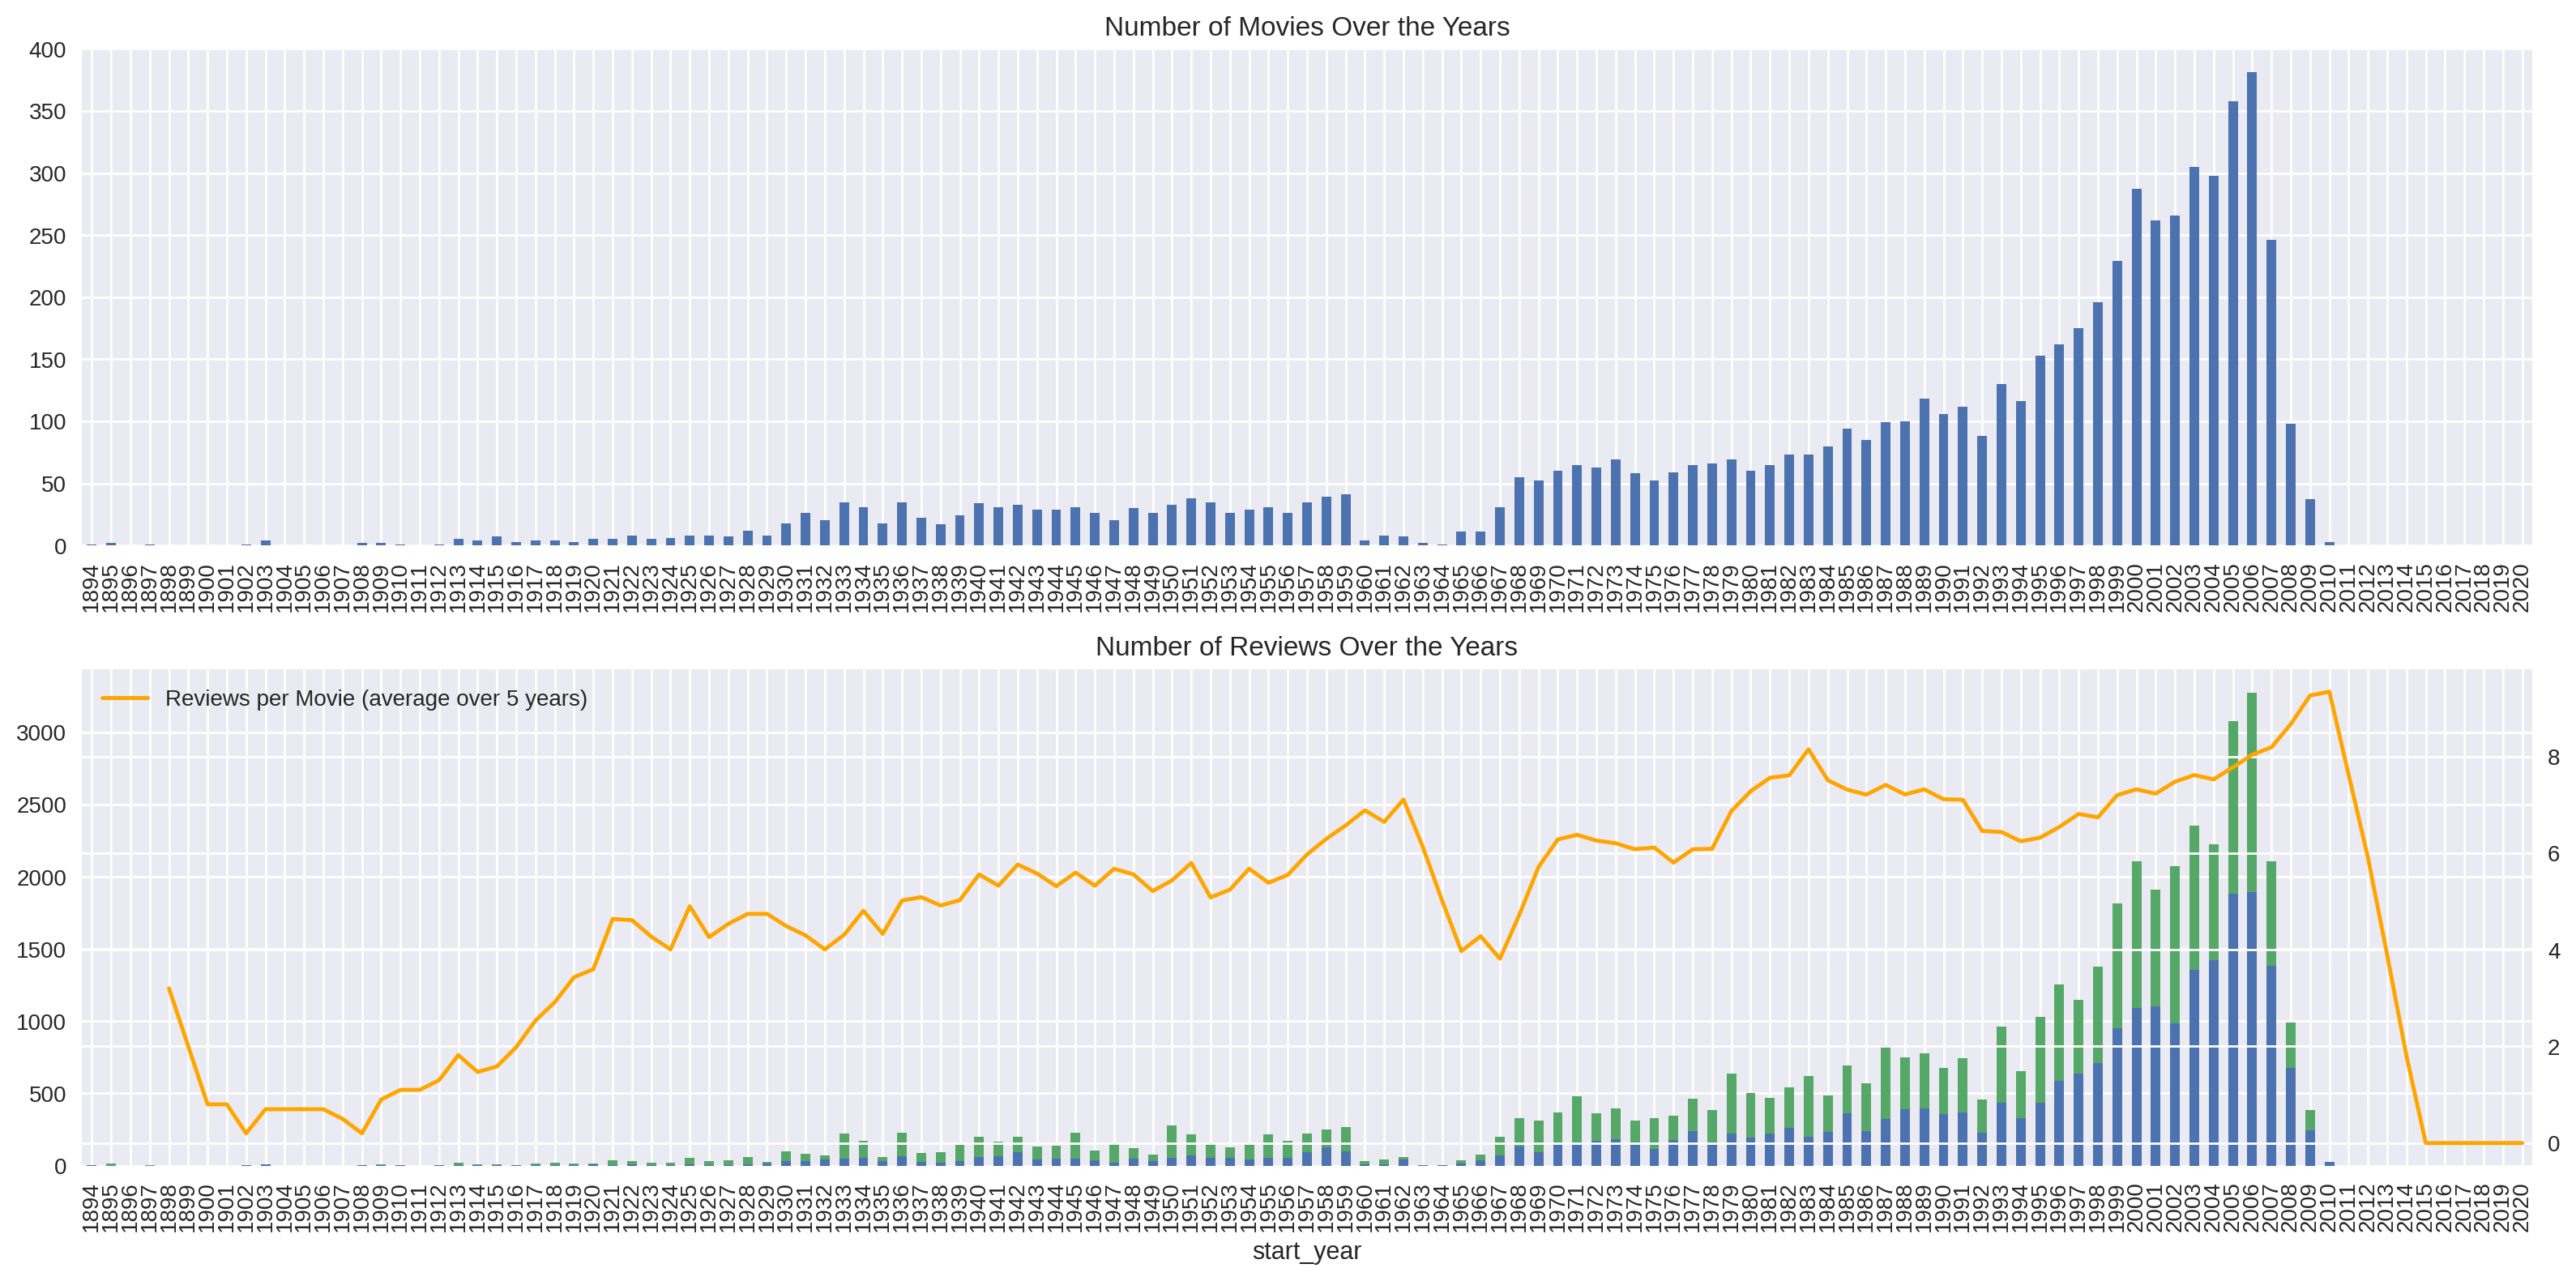

In [12]:
# display the number of movie released and the number of reviews per year

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over the Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews  (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='Reviews per Movie (average over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over the Years') 

fig.tight_layout()

- From the graph above we know the number of reviews and the average number of film reviews increases every year.
- We have also seen that since 2007 the number of films reviewed has decreased, this means that film critics need at least 3 to 4 years to be able to review films in a year.

Check the distribution of number of reviews per movie with proper count and KDE (just to see how it differs from exact count).

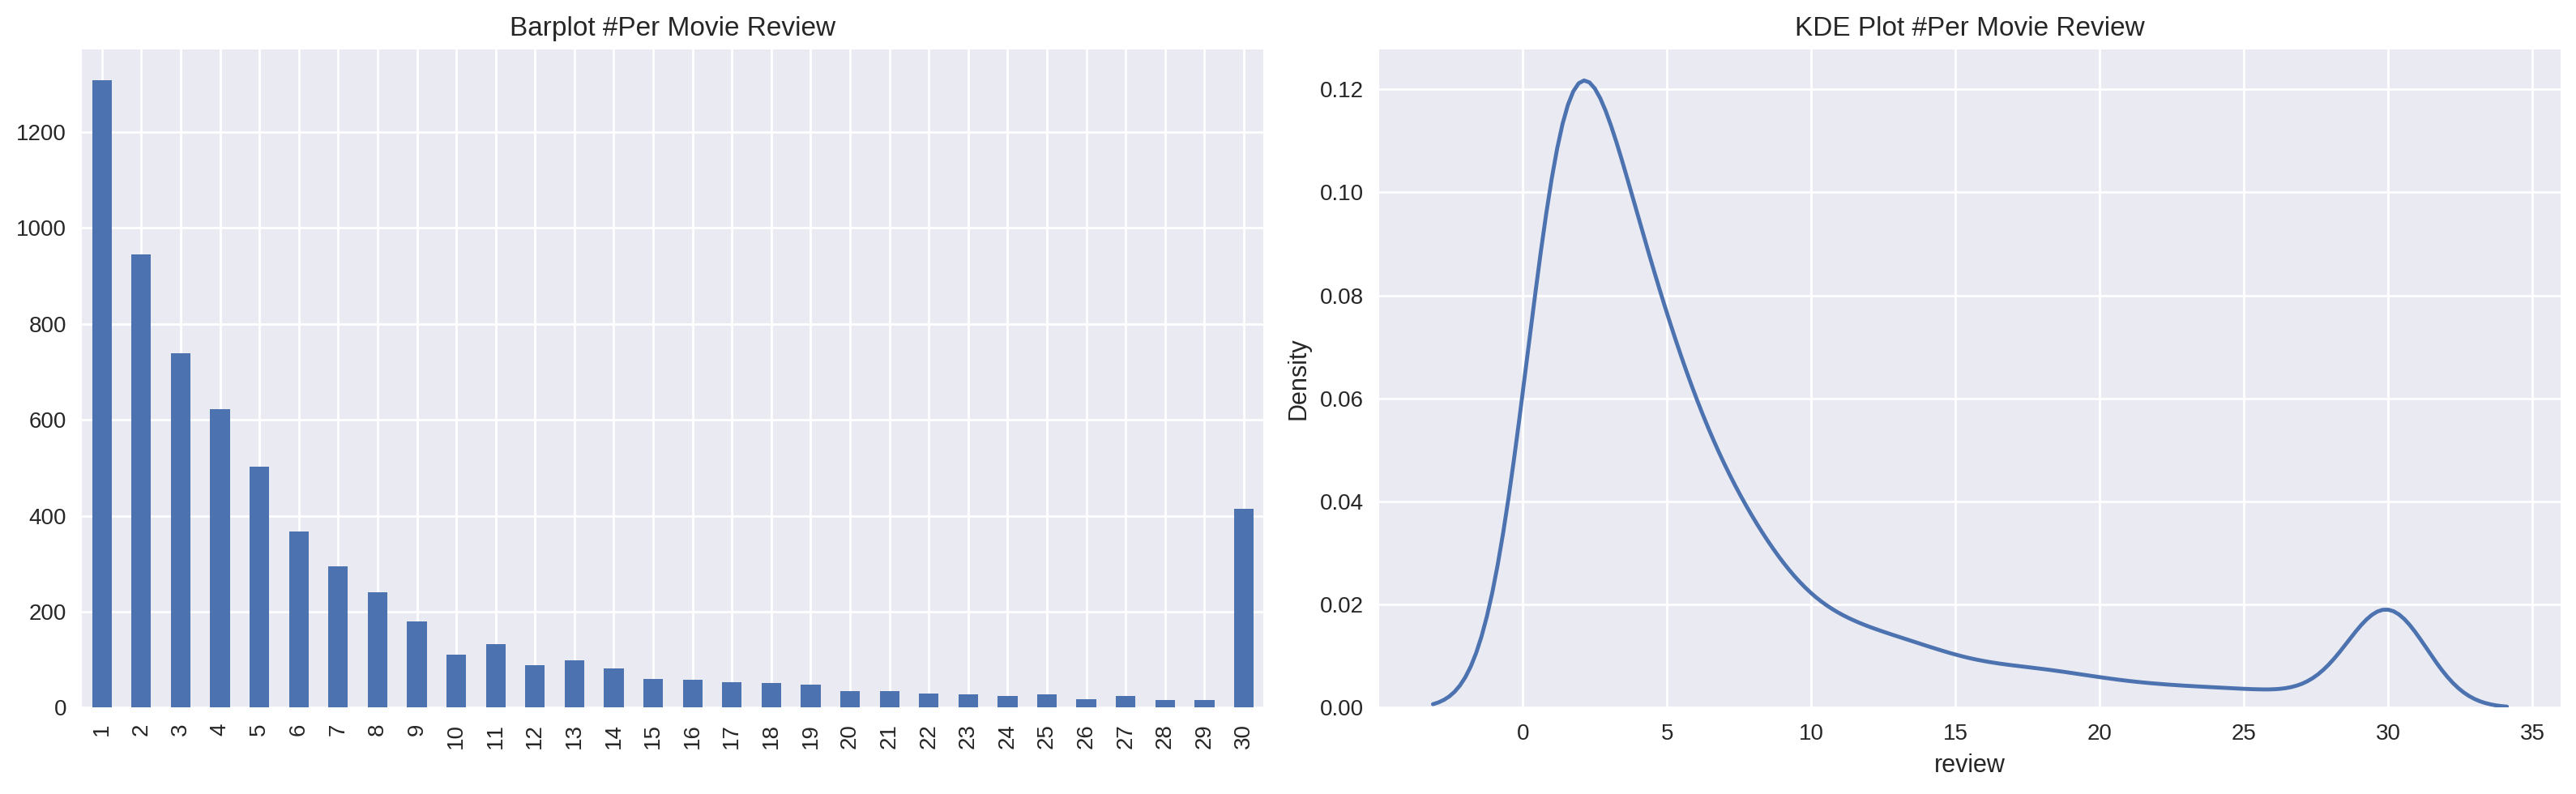

In [13]:
# display the distribution of number of reviews per movie

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Barplot #Per Movie Review') 

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot #Per Movie Review') 

fig.tight_layout()

- We can see that most of the movies only have 1 review, and the number decreases the more reviews are given. We also see that there are 30 reviews which is quite a lot for the movies reviewed.

In [14]:
# check distribution of positive and negatif reviews
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

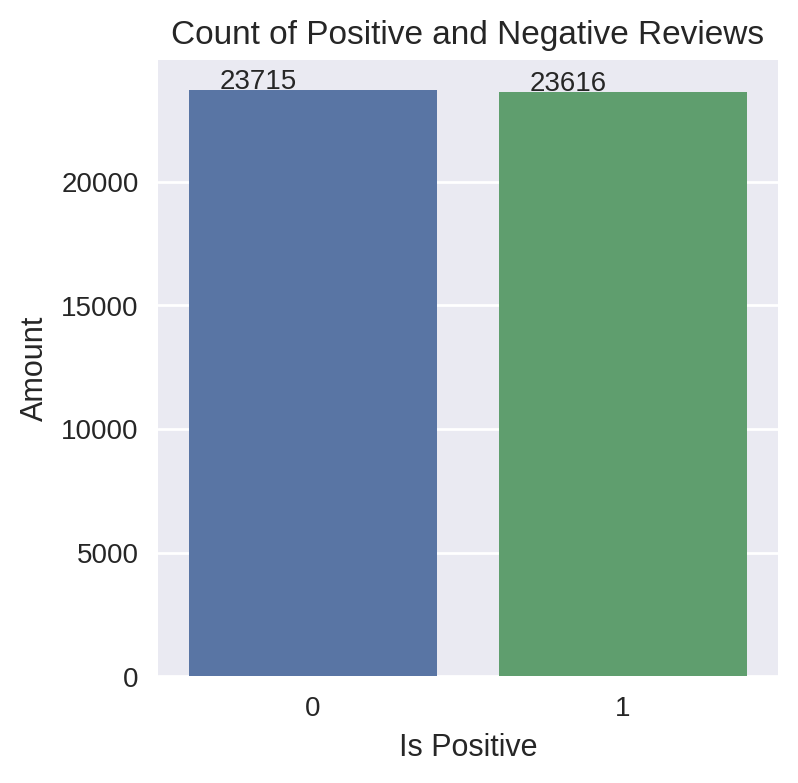

In [15]:
# Creating plot 
plt.figure(figsize=(4,4))
splot = sns.countplot(x='pos', data=df_reviews, order=df_reviews['pos'].value_counts().index)
plt.xlabel('Is Positive')
plt.ylabel('Amount')
plt.title('Count of Positive and Negative Reviews')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

- Positive and negative reviews have the same amount

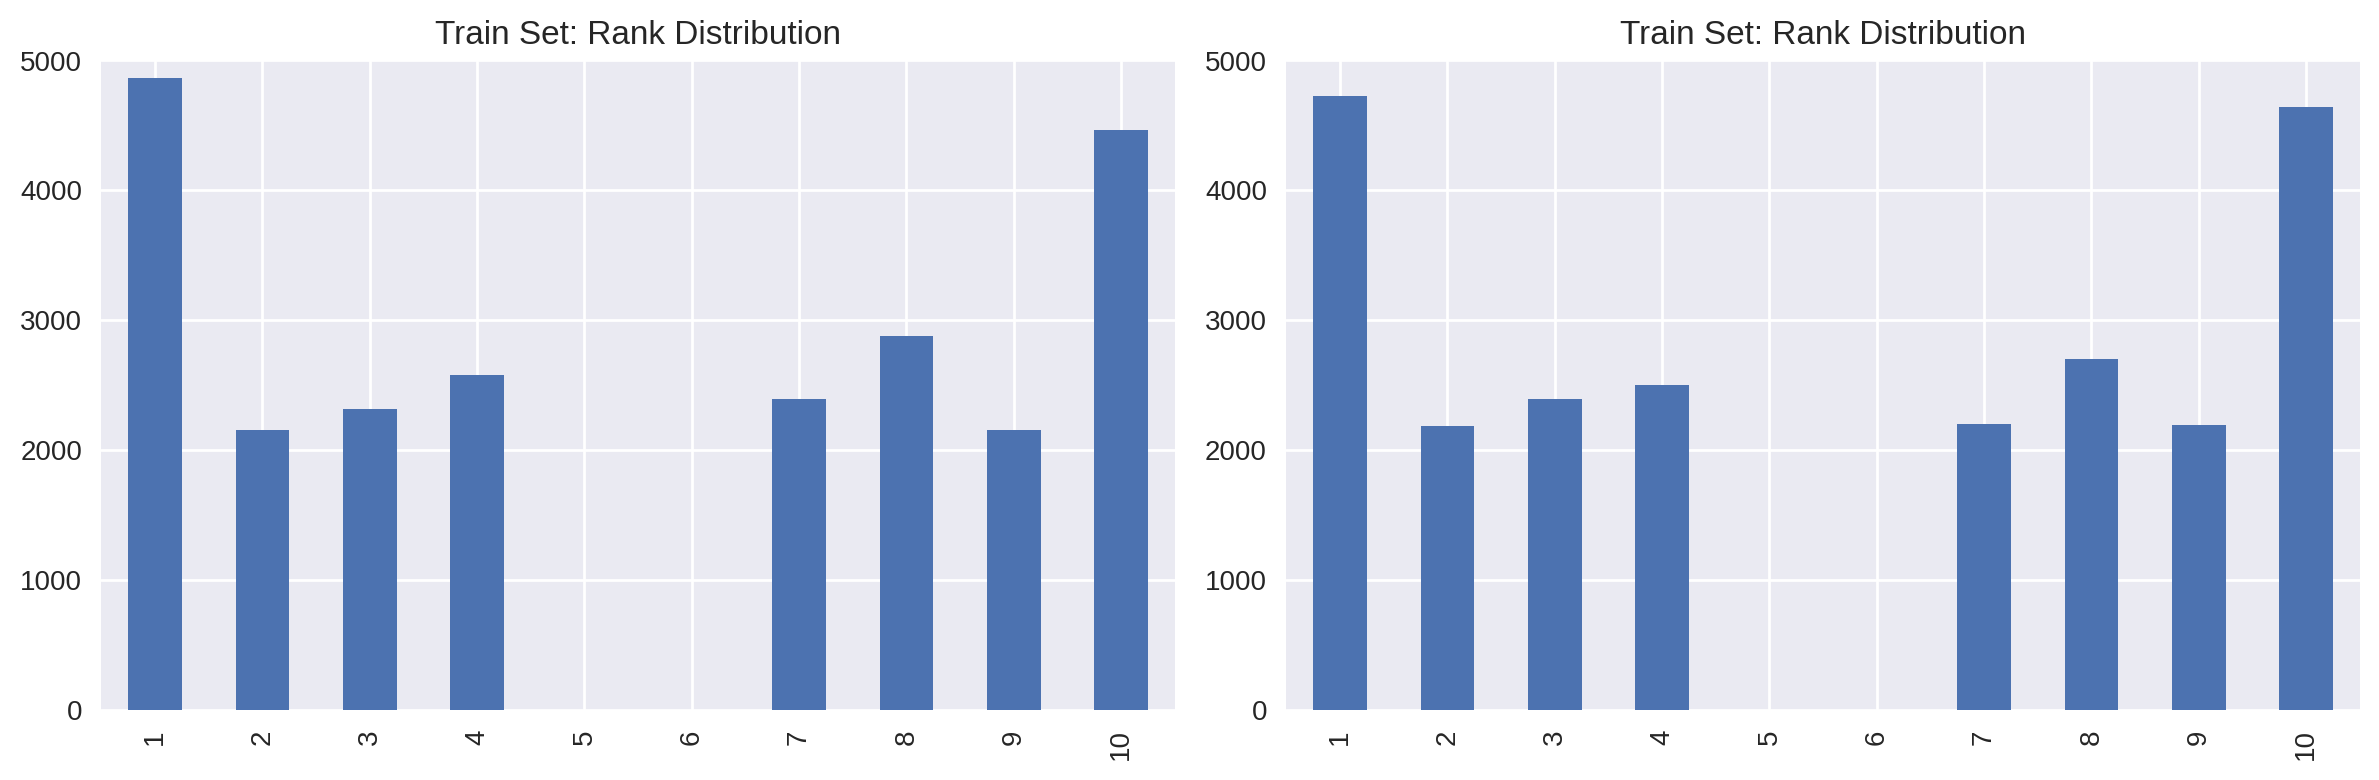

In [16]:
# display the rating distribution

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train Set: Rank Distribution')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train Set: Rank Distribution')

fig.tight_layout()

- Films that is rated 1 has the same amount as films that is rated 10
- While other ratings besides the above have a similar distribution

Distribution of negative and positive reviews over the years for the two parts of the dataset

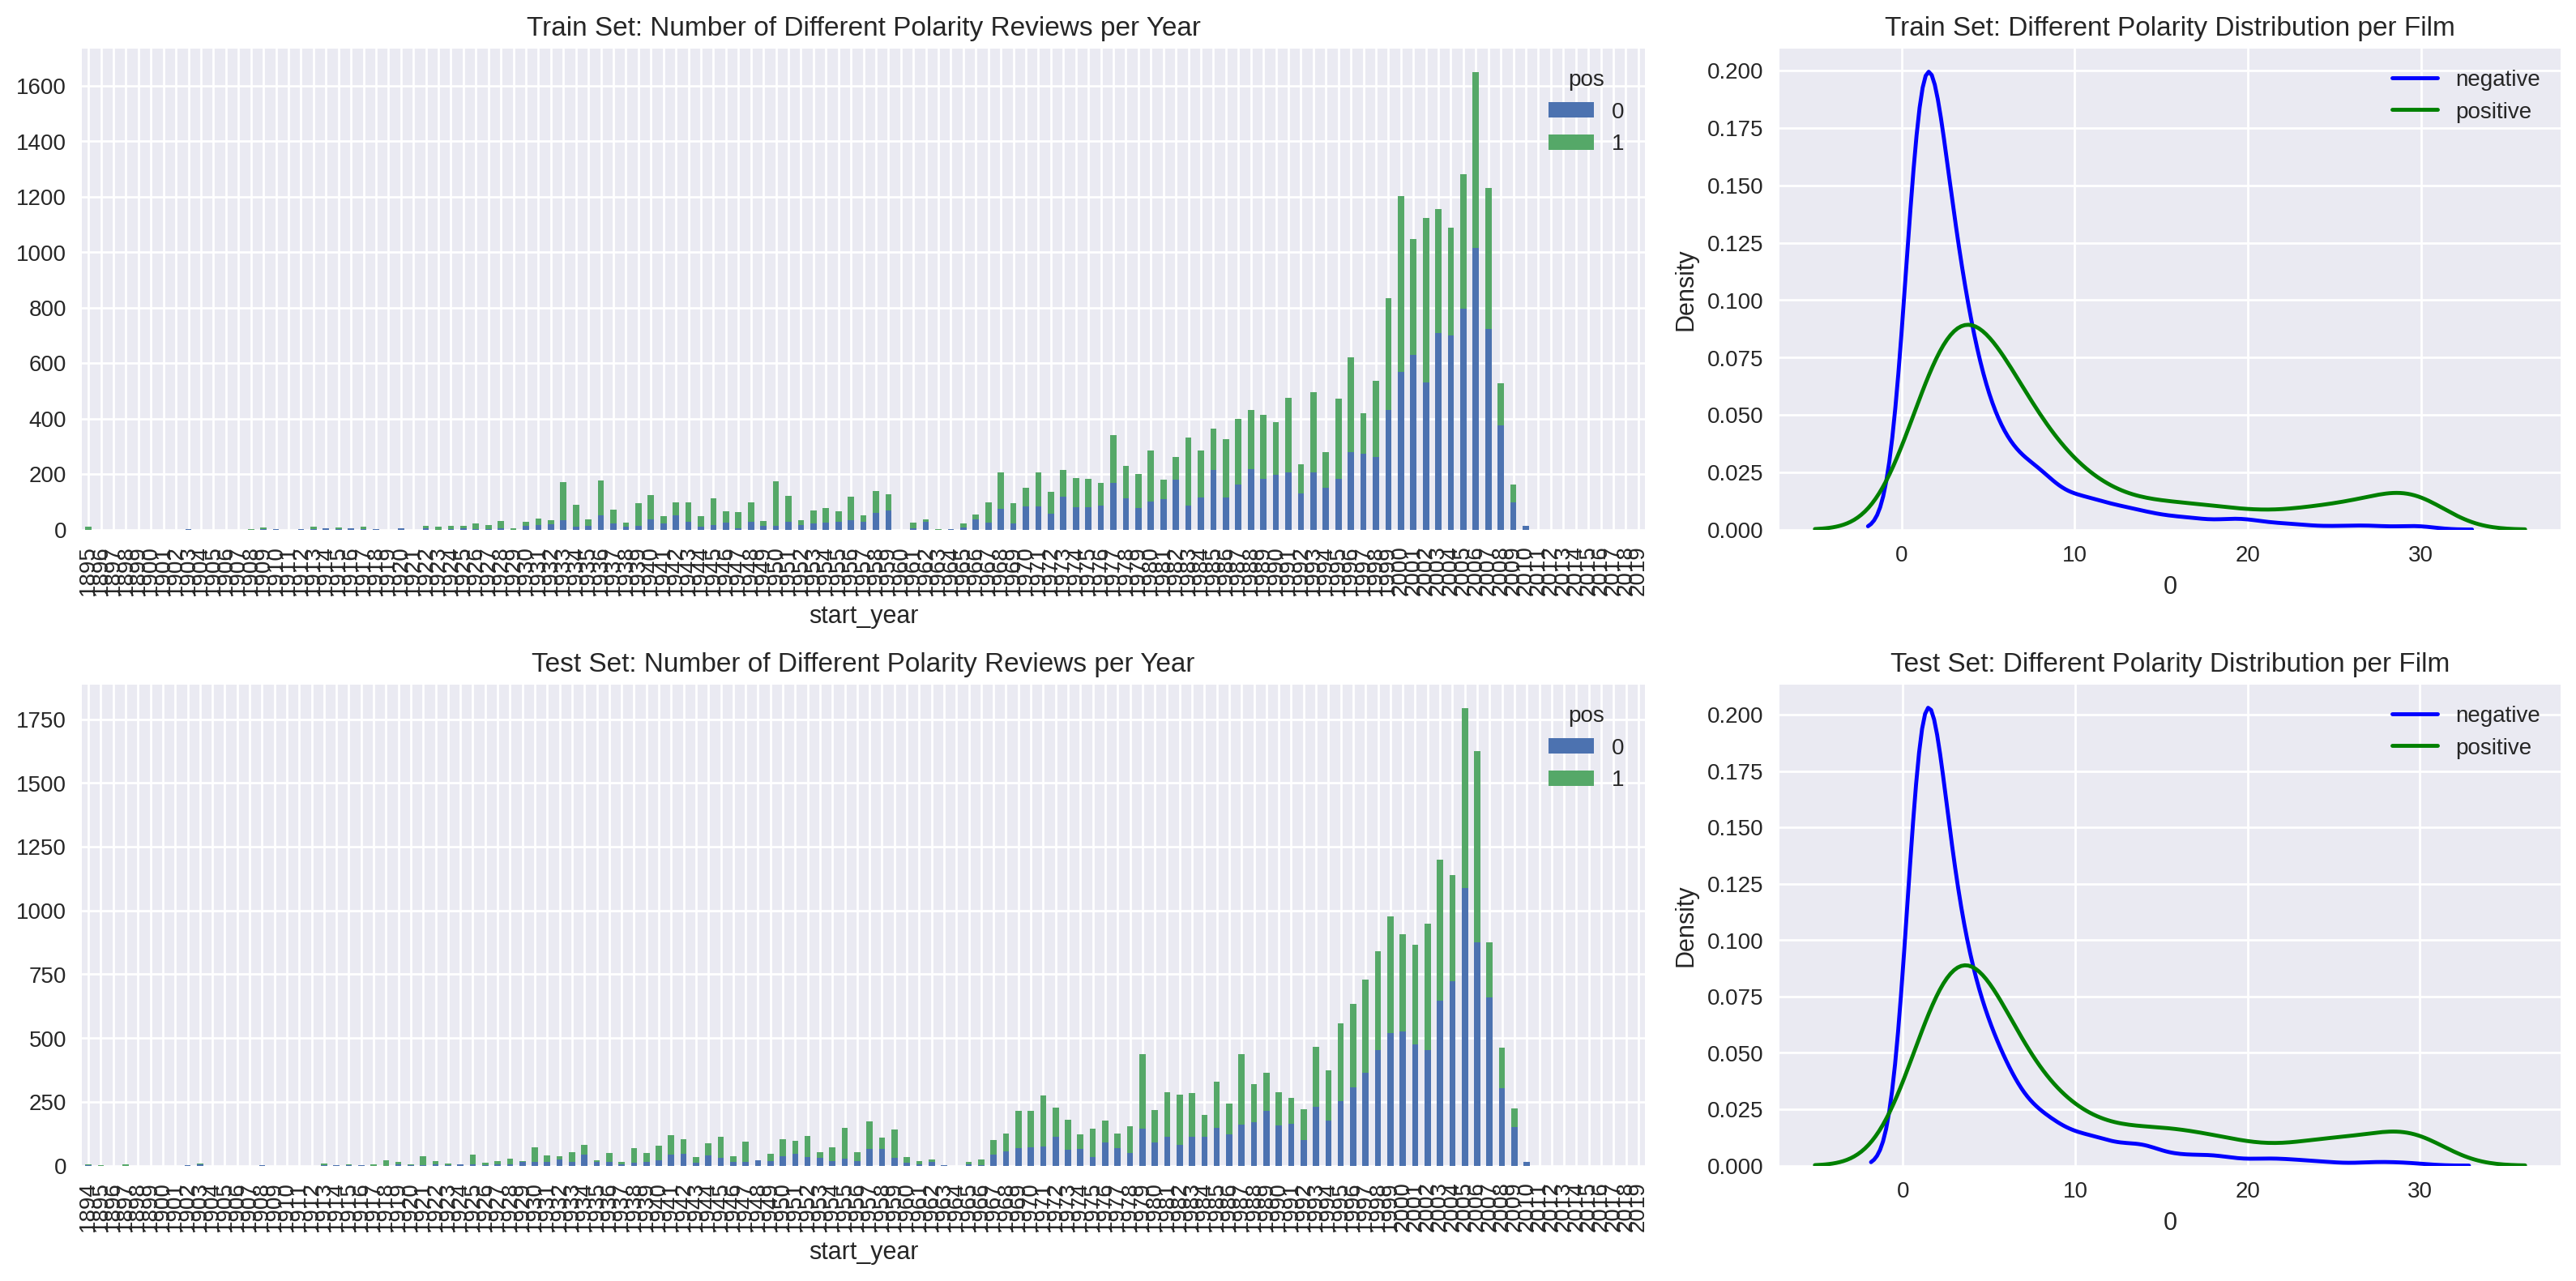

In [17]:
# display the distribution of positive and negative reviews

fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Train Set: Number of Different Polarity Reviews per Year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Train Set: Different Polarity Distribution per Film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test Set: Number of Different Polarity Reviews per Year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Test Set: Different Polarity Distribution per Film')

fig.tight_layout()

- Although the number of positive and negative reviews is the same, but the distribution of positive and negative reviews has a slightly different.

## 4. Model Preprocessing

### 4.1 Evaluation Procedure

Develop evaluations that can be used for all models in this task on a regular basis.

In [18]:
# create evaluation metric function

import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1 
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

### 4.2. Normalization

We assume all models below accept text in lowercase and without numbers, punctuation, etc.

In [19]:
# substitution - with each matching pattern to be substituted
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')

In [20]:
# print the sample
df_reviews[['review', 'review_norm']].head()

,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenti...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in...
4,I'm totally agree with GarryJohal from Singapo...,i m totally agree with garryjohal from singapo...


### 4.3. Train / Test Split

Fortunately, the entire dataset is already divided into one section for training/testing. The corresponding flag is 'ds_part'.

In [21]:
# train and test split

df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


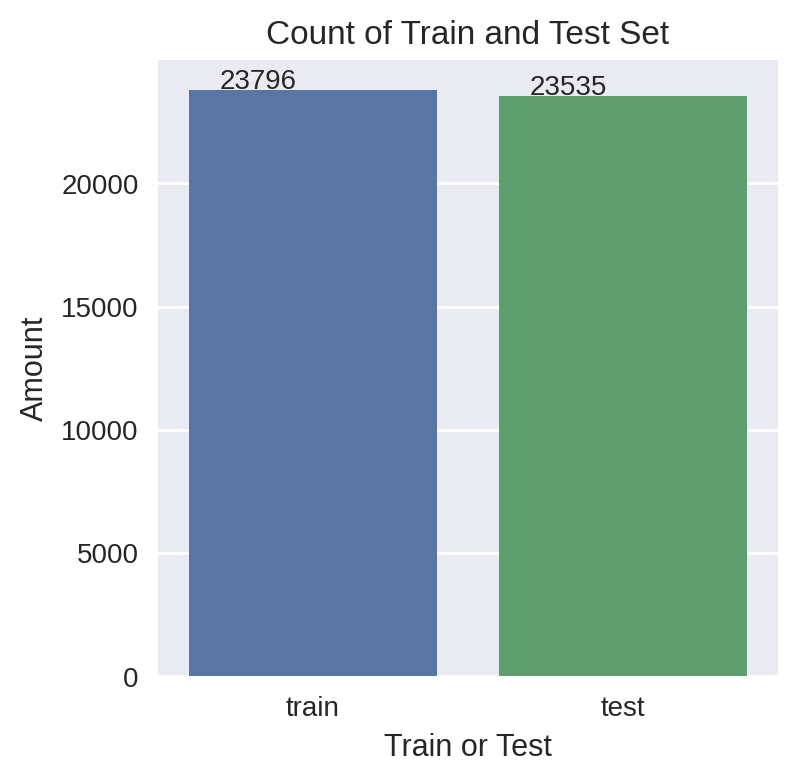

In [22]:
# Creating plot 
plt.figure(figsize=(4,4))
splot = sns.countplot(x='ds_part', data=df_reviews, order=df_reviews['ds_part'].value_counts().index)
plt.xlabel('Train or Test')
plt.ylabel('Amount')
plt.title('Count of Train and Test Set')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Train set and test set have the same amount of data.

## 5. Train the Models

### 5.1. Model 1 - Konstan

In [23]:
# import dummyclassifier model
from sklearn.dummy import DummyClassifier

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


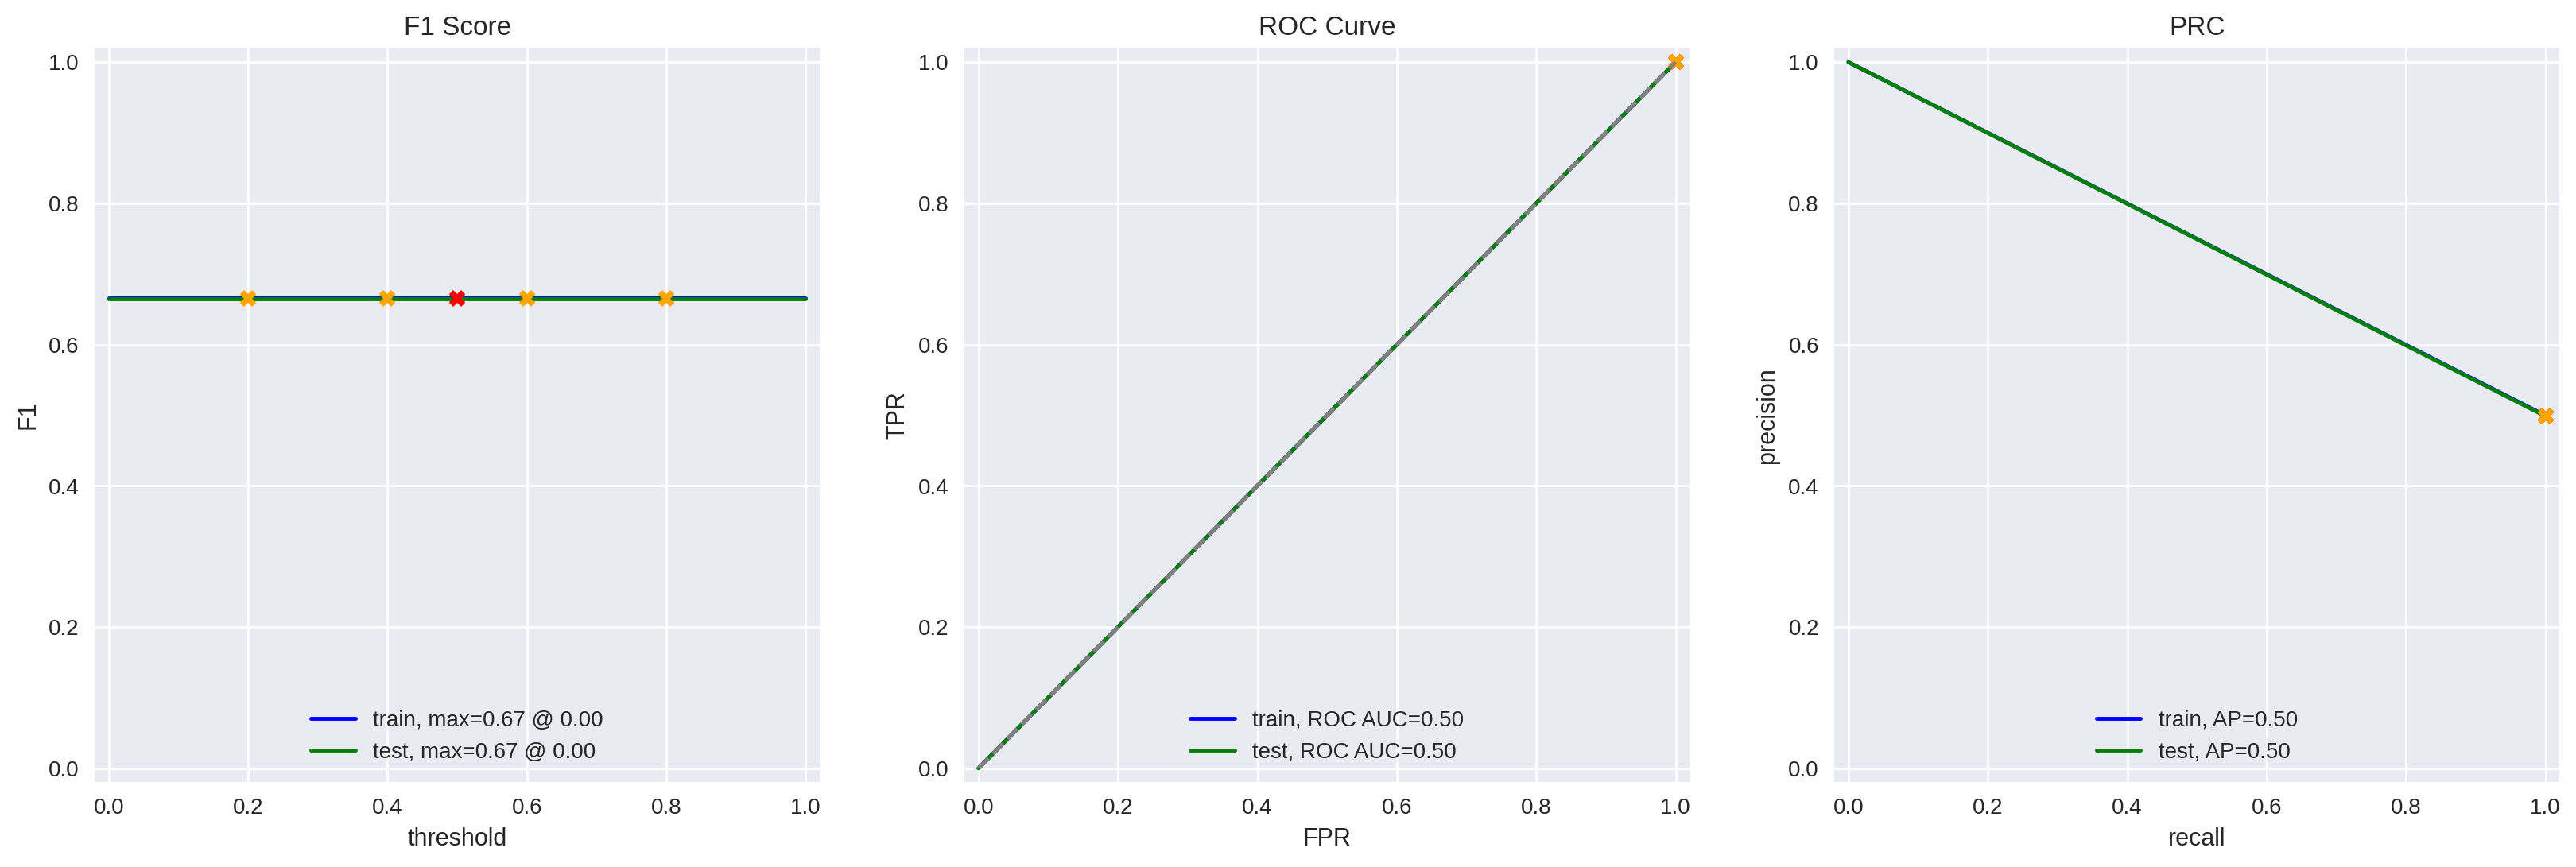

In [24]:
# train the dummy classifier model
dummy_clf = DummyClassifier(strategy='constant', constant=1)
#dummy_clf = DummyClassifier(strategy='most_frequent')

model_0 = dummy_clf.fit(X=df_reviews_train, y=train_target)

evaluate_model(model_0, np.empty(len(train_target)), train_target, np.empty(len(test_target)), test_target)

We only use the dummy classifier model as a baseline for the next model.

Findings:
- In the dummy classifier model, the F1 value is far from the specified threshold value.
- The model that we will train next should have a better F1 value than this model.

### 5.2 Model 2 - NLTK, TF-IDF and LR

TF-IDF

In [25]:
# import required library

import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# find stop words
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True)

In [27]:
# Run the fit_transform on the train set function to calculate the TF-IDF for the text corpus
train_features = tfidf_vectorizer_2.fit_transform(df_reviews_train['review_norm'])
print(train_features.shape)

(23796, 71531)


In [28]:
# Run the fit_transform on the test set function to calculate the TF-IDF for the text corpus
test_features = tfidf_vectorizer_2.transform(df_reviews_test['review_norm'])
print(train_features.shape)

(23796, 71531)


In [29]:
# training the train set with a logistic regression model 
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()

model_2.fit(train_features, train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


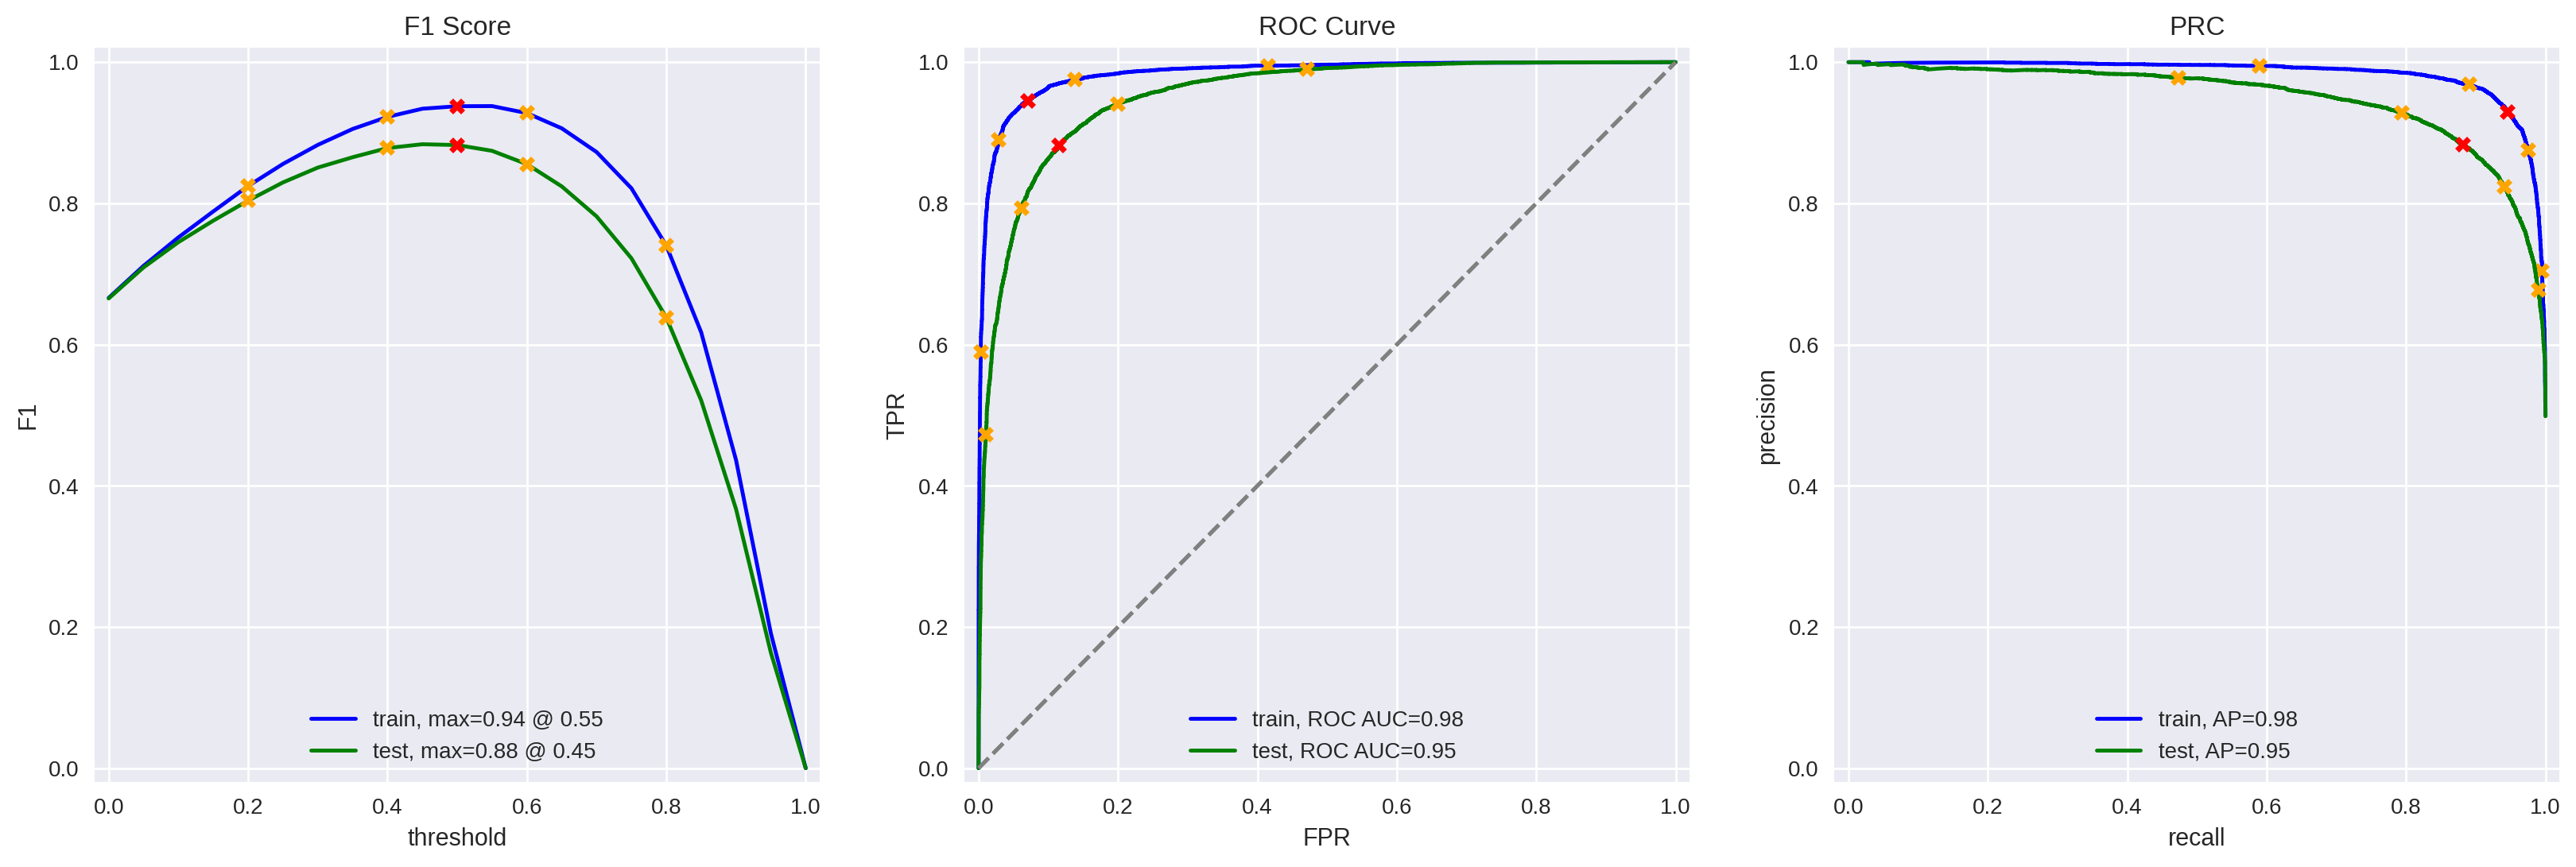

In [30]:
# perform evaluation matrix on the logistic regression model
evaluate_model(model_2, train_features, train_target, test_features, test_target)

Findings:
- The logistic regression model with NLTK, TF-IDF produces a much better F1 value than the dummy classifier model and passes the threshold value.
- For the time being we can make this vectorization method the best model even though there is a slight difference between train and test.

### 5.3. Model 3 - NLTK, TF-IDF and XGBOOST

In [31]:
%%time

# perform xgboost model
import xgboost as xgb
model_3 = xgb.XGBClassifier(max_depth = 3)
model_3.fit(train_features, train_target)

CPU times: user 1min 9s, sys: 85.2 ms, total: 1min 9s
Wall time: 40.4 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

          train  test
Accuracy   0.88  0.84
F1         0.88  0.85
APS        0.95  0.92
ROC AUC    0.95  0.92


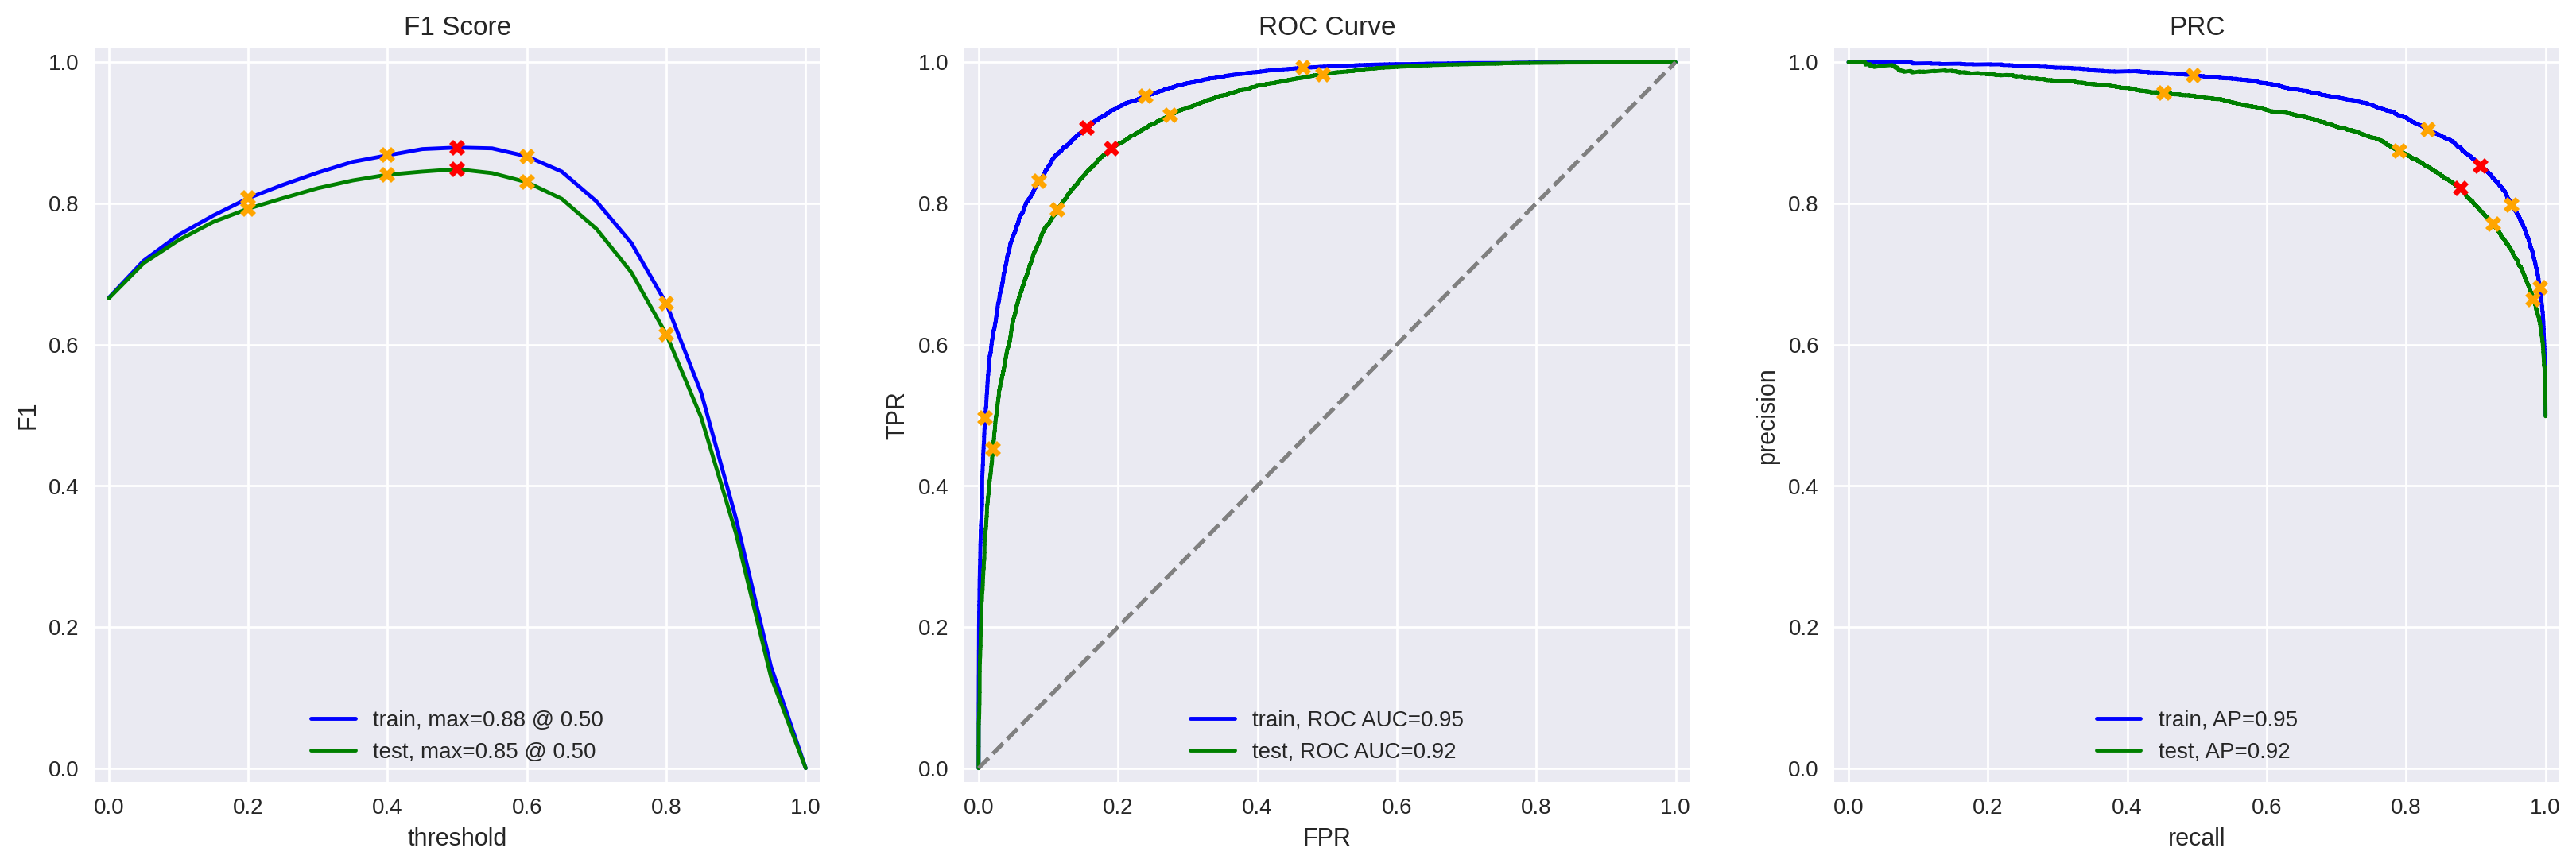

In [32]:
# perform evaluation matrix on the xgboost model
evaluate_model(model_3, train_features, train_target, test_features, test_target)

- Although the F1 score results of NLTK, TF-IDF with XGBoost are not better than the vectorization results with Logistic Regression, this model is less prone to overfitting. 
- We think this model is better than the Logistic regression model.

### 5.4. Model 4 - spaCy, TF-IDF and LR

In [33]:
# import spacy
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [34]:
# craete tokenization function
def text_preprocessing_4(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [35]:
%%time

# split text into tokens on the train set. this process takes a lot of time!
df_reviews_train['review_tokenized_4'] = df_reviews_train['review_norm'].progress_apply(lambda x: text_preprocessing_4(x))

  0%|          | 0/23796 [00:00<?, ?it/s]

CPU times: user 6min 43s, sys: 2.54 s, total: 6min 46s
Wall time: 6min 52s


In [36]:
%%time

# split text into tokens on the test set. this process takes a lot of time
df_reviews_test['review_tokenized_4'] = df_reviews_test['review_norm'].progress_apply(lambda x: text_preprocessing_4(x))

  0%|          | 0/23535 [00:00<?, ?it/s]

CPU times: user 6min 24s, sys: 2.34 s, total: 6min 27s
Wall time: 6min 32s


The tokenization and lemmatization process in spaCy takes a long time.

In [37]:
# print the sample of tokenization results
df_reviews_train['review_tokenized_4'].head()

0    the pakage imply that warren beatty and goldie...
1    how the hell do they get this make    present ...
7    this true story of carlson s raider be more of...
8    should have be title   balderdash    little in...
9    the movie   gung ho     the story of carlson s...
Name: review_tokenized_4, dtype: object

In [38]:
# print the sample of tokenization results
df_reviews_test['review_tokenized_4'].head()

2    there be no real story the film seem more like...
3    um       a serious film about troubled teen in...
4    I m totally agree with garryjohal from singapo...
5    this be the first movie I ve see from singapor...
6    yes non singaporean s can t see what s the big...
Name: review_tokenized_4, dtype: object

In [39]:
# call the function
tfidf_vectorizer_4 = TfidfVectorizer()

In [40]:
# Run the fit_transform on the train set function to calculate the TF-IDF for the text corpus
train_features_4 = tfidf_vectorizer_4.fit_transform(df_reviews_train['review_tokenized_4'])
print(train_features_4.shape)

(23796, 58951)


In [41]:
# Run the fit_transform on the test set function to calculate the TF-IDF for the text corpus
test_features_4 = tfidf_vectorizer_4.transform(df_reviews_test['review_tokenized_4'])
print(test_features_4.shape)

(23535, 58951)


In [42]:
df_reviews_train['review_norm']

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made   presenti...
7        this true story of carlson s raiders is more o...
8        should have been titled  balderdash   little i...
9        the movie  gung ho    the story of carlson s m...
                               ...                        
47253    o my gosh    just give me a minute to breath  ...
47254    i can t tell you all how much i love this movi...
47255    legend of zu is possibly the most exciting mov...
47256    this movie is well done on so many levels that...
47257    as a history nut who is particularly intereste...
Name: review_norm, Length: 23796, dtype: object

In [43]:
%%time

# training the train set with a logistic regression model 
from sklearn.linear_model import LogisticRegression

model_4 = LogisticRegression()

model_4.fit(train_features_4, train_target)

CPU times: user 2 s, sys: 2.22 s, total: 4.23 s
Wall time: 2.24 s


LogisticRegression()

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


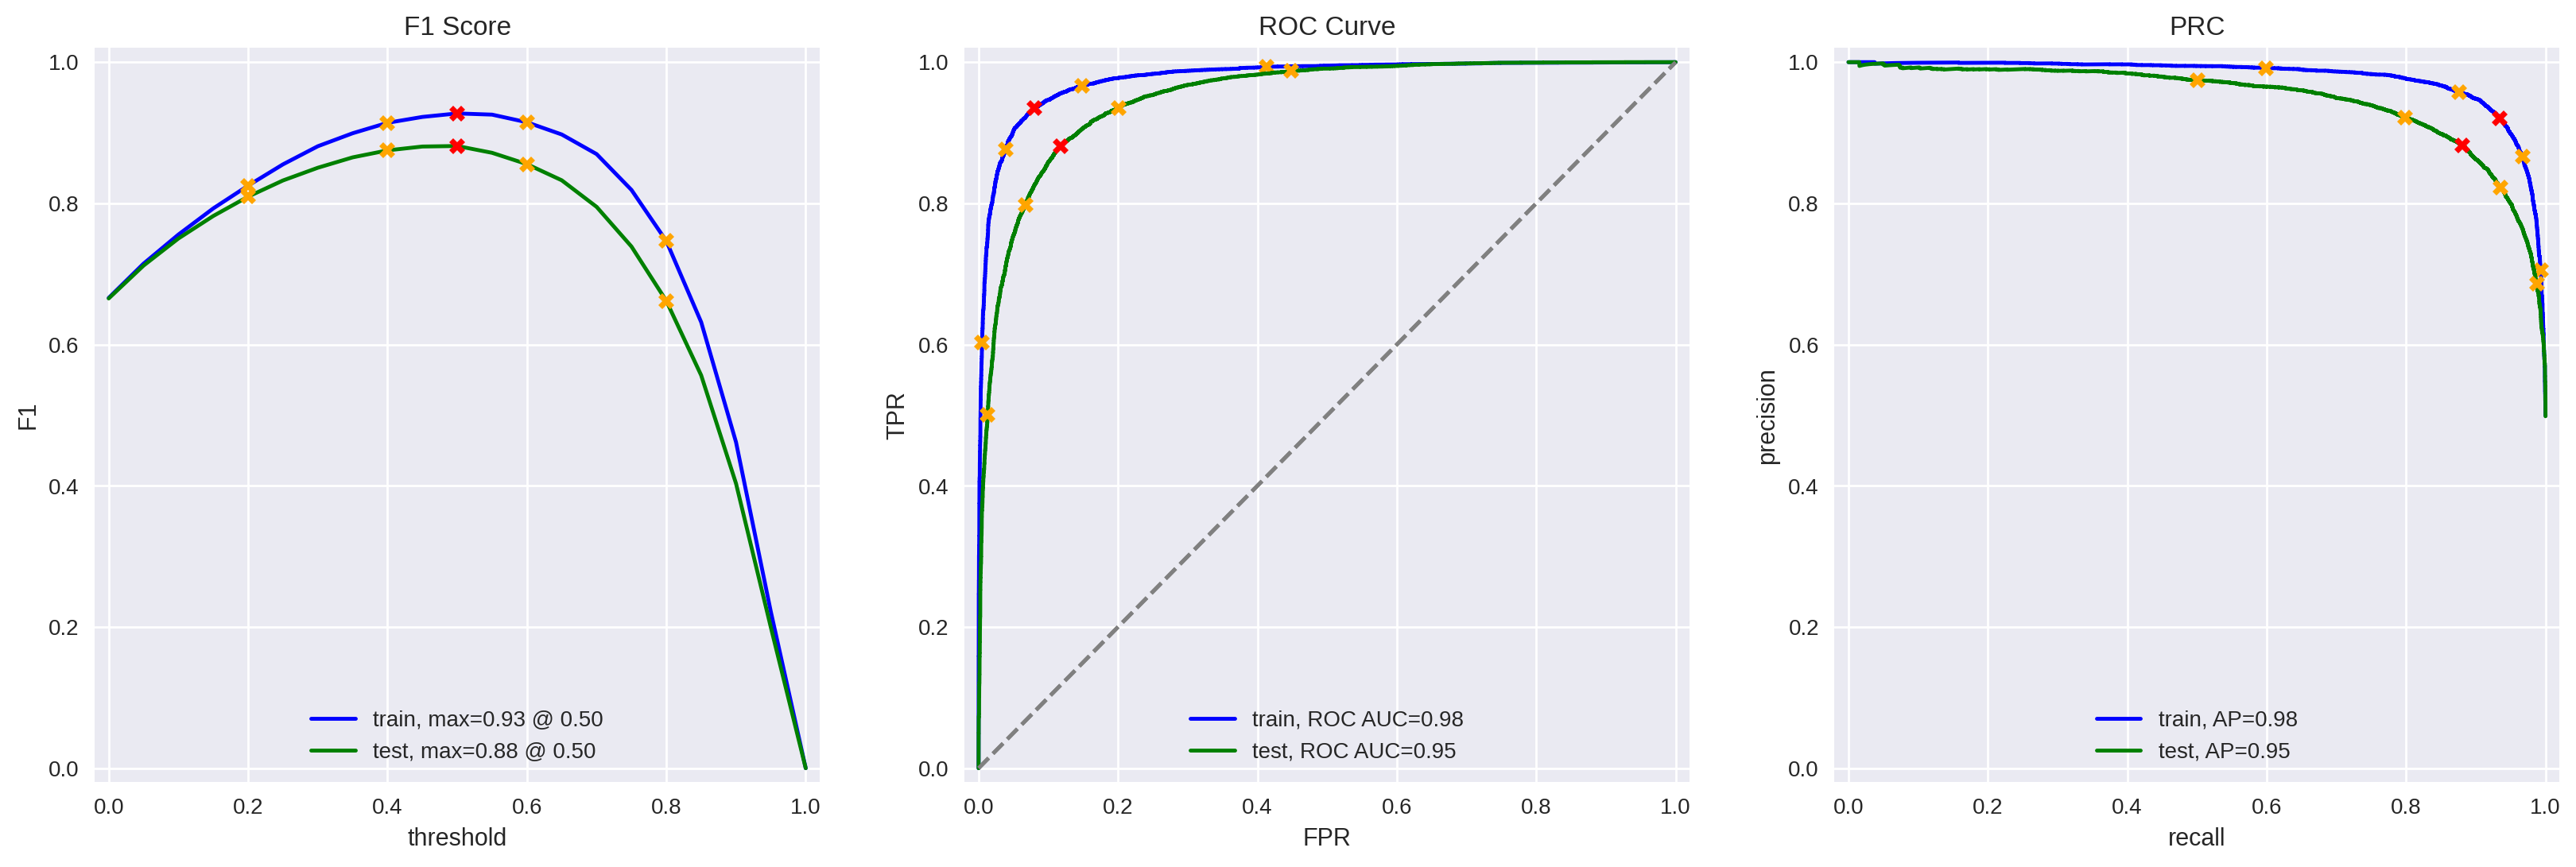

In [44]:
# perform evaluation matrix on the logistic regression model
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

Findings:
- The logistic regression model with Spacy, TF-IDF produces F1 values that are almost the same as NLTK, TF-IDF but with slightly better results.
- We can make this model the best-performing model in the meantime.

### 5.5. Model 5 - spaCy, TF-IDF and LGBMClassifier

In [45]:
%%time

# perform LGBM model with spaCy, TF-IDF

from lightgbm import LGBMClassifier

model_5 = LGBMClassifier(learning_rate=.1)

model_5.fit(train_features_4, train_target)

CPU times: user 35.4 s, sys: 231 ms, total: 35.6 s
Wall time: 35.8 s


LGBMClassifier()

          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


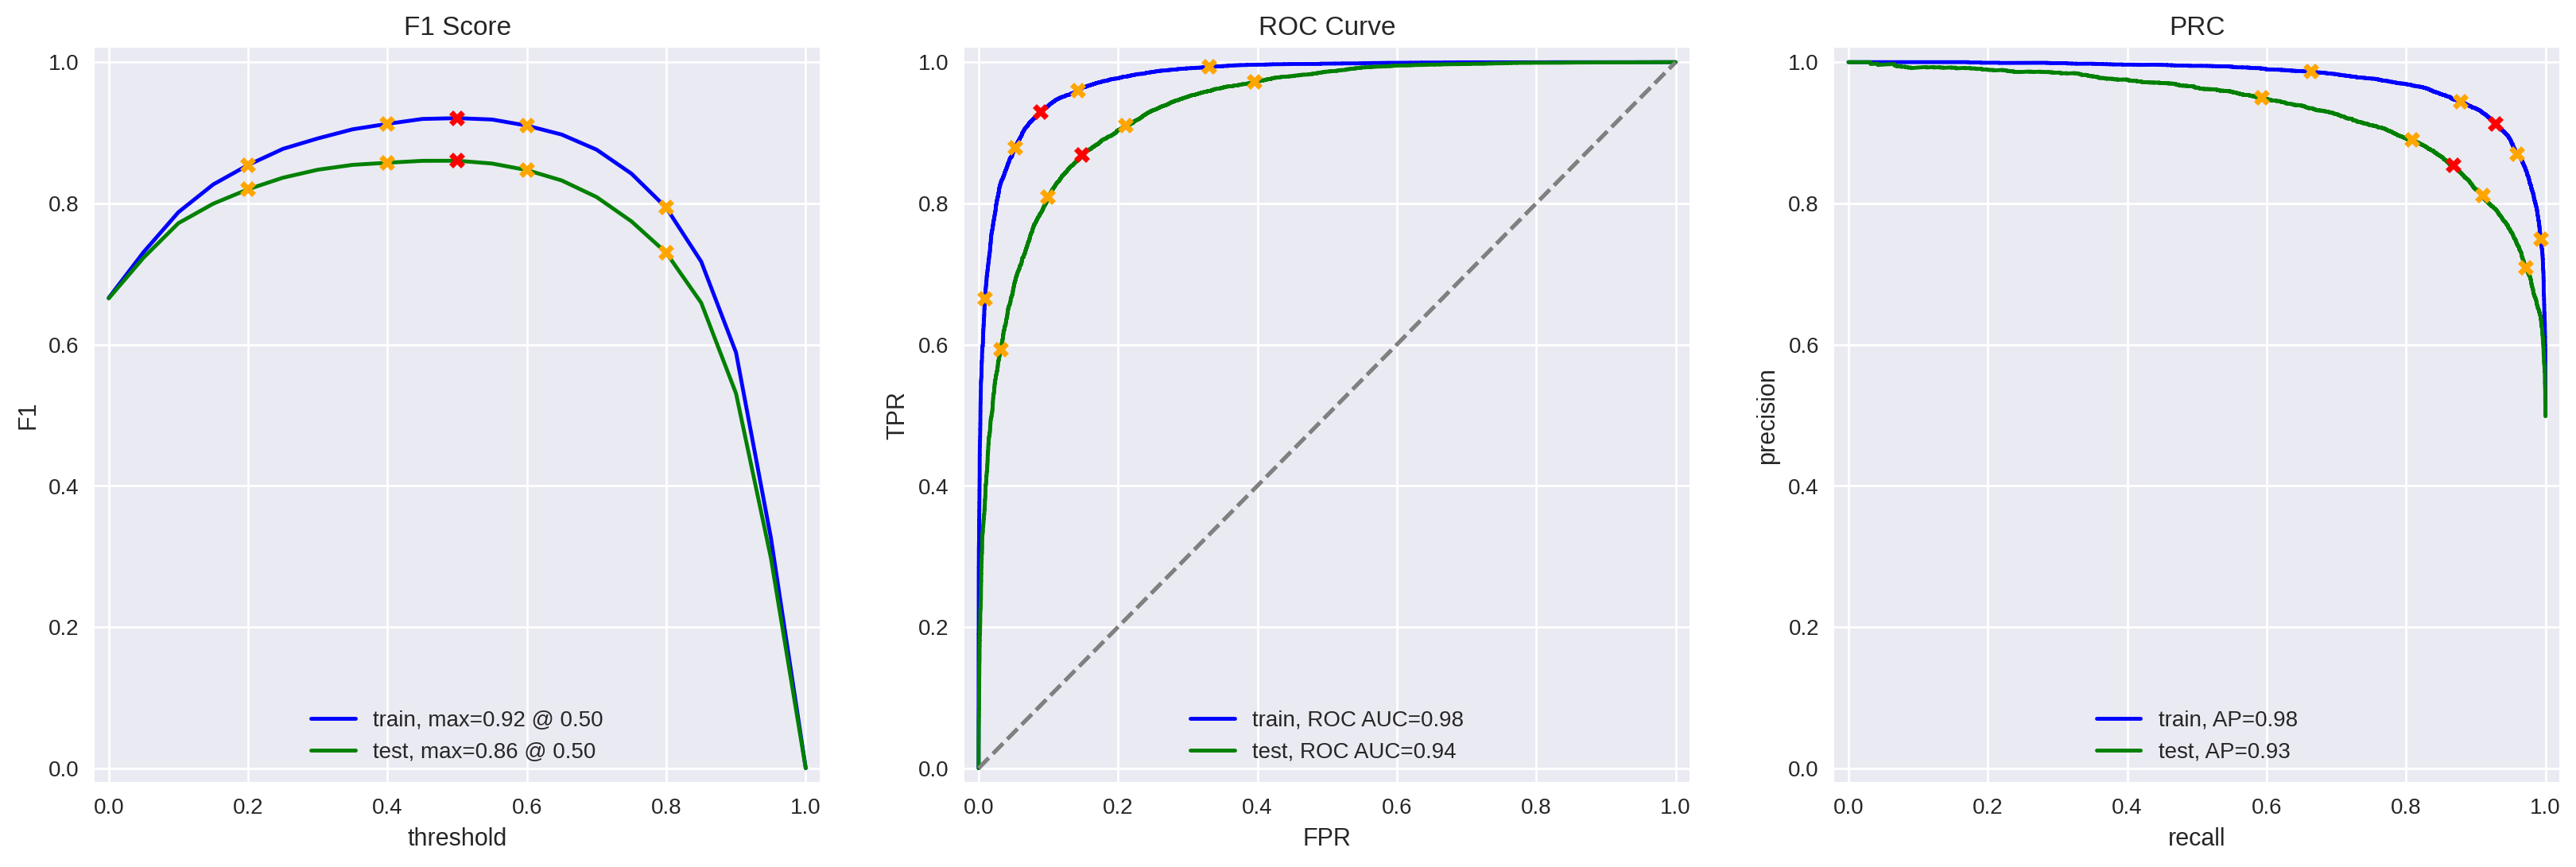

In [46]:
# perform evaluation matrix on the LGBM model
evaluate_model(model_5, train_features_4, train_target, test_features_4, test_target)

Findings:
- The LGBM model with Spacy, TF-IDF produces F1 values that are not better than the logistic regression model with Spacy, TF-IDF.

### 5.6. Model 6 - BERT and LR

In [47]:
# import the required libraries
import torch
import transformers

In [48]:
# Start the tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [49]:
# Convert the text into a token ID, then the BERT tokenizer will insert the token ID

def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # teks ke padded id token bersama dengan attention mask 
    
    for input_text in tqdm(texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Gunakan {device} perangkat.')
    
    # get embedding in batch 

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [50]:
%%time

# Attention! Running BERT for thousands of texts may take a long time on the CPU, at least a few hours
train_features_6 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

  0%|          | 0/23796 [00:00<?, ?it/s]

Gunakan cuda perangkat.


  0%|          | 0/238 [00:00<?, ?it/s]

CPU times: user 15min 34s, sys: 2.74 s, total: 15min 36s
Wall time: 15min 44s


In [51]:
# displays the dimensions of the train set after embedding
print(df_reviews_train['review_norm'].shape)
print(train_features_6.shape)
print(train_target.shape)

(23796,)
(23796, 768)
(23796,)


In [52]:
%%time

# Attention! Running BERT for thousands of texts may take long run on CPU, several hours
test_features_6 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

  0%|          | 0/23535 [00:00<?, ?it/s]

Gunakan cuda perangkat.


  0%|          | 0/236 [00:00<?, ?it/s]

CPU times: user 15min 14s, sys: 1.88 s, total: 15min 16s
Wall time: 15min 19s


In [53]:
# displays the dimensions of the test set after embedding
print(df_reviews_test['review_norm'].shape)
print(test_features_6.shape)
print(test_target.shape)

(23535,)
(23535, 768)
(23535,)


In [54]:
# if you have already obtained the embedding, it is recommended to save it so that it is ready for 
# np.savez_compressed('features_6.npz', train_features_6=train_features_6, test_features_6=test_features_6)

# and load...
# with np.load('features_6.npz') as data:
#     train_features_6 = data['train_features_6']
#     test_features_6 = data['test_features_6']

In [55]:
%%time

# perform logistic regression model with BERT
from sklearn.linear_model import LogisticRegression

model_6 = LogisticRegression(max_iter=1000)

model_6.fit(train_features_6, train_target)

CPU times: user 25.1 s, sys: 1.91 s, total: 27 s
Wall time: 16 s


LogisticRegression(max_iter=1000)

          train  test
Accuracy   0.88  0.86
F1         0.88  0.86
APS        0.95  0.94
ROC AUC    0.95  0.94


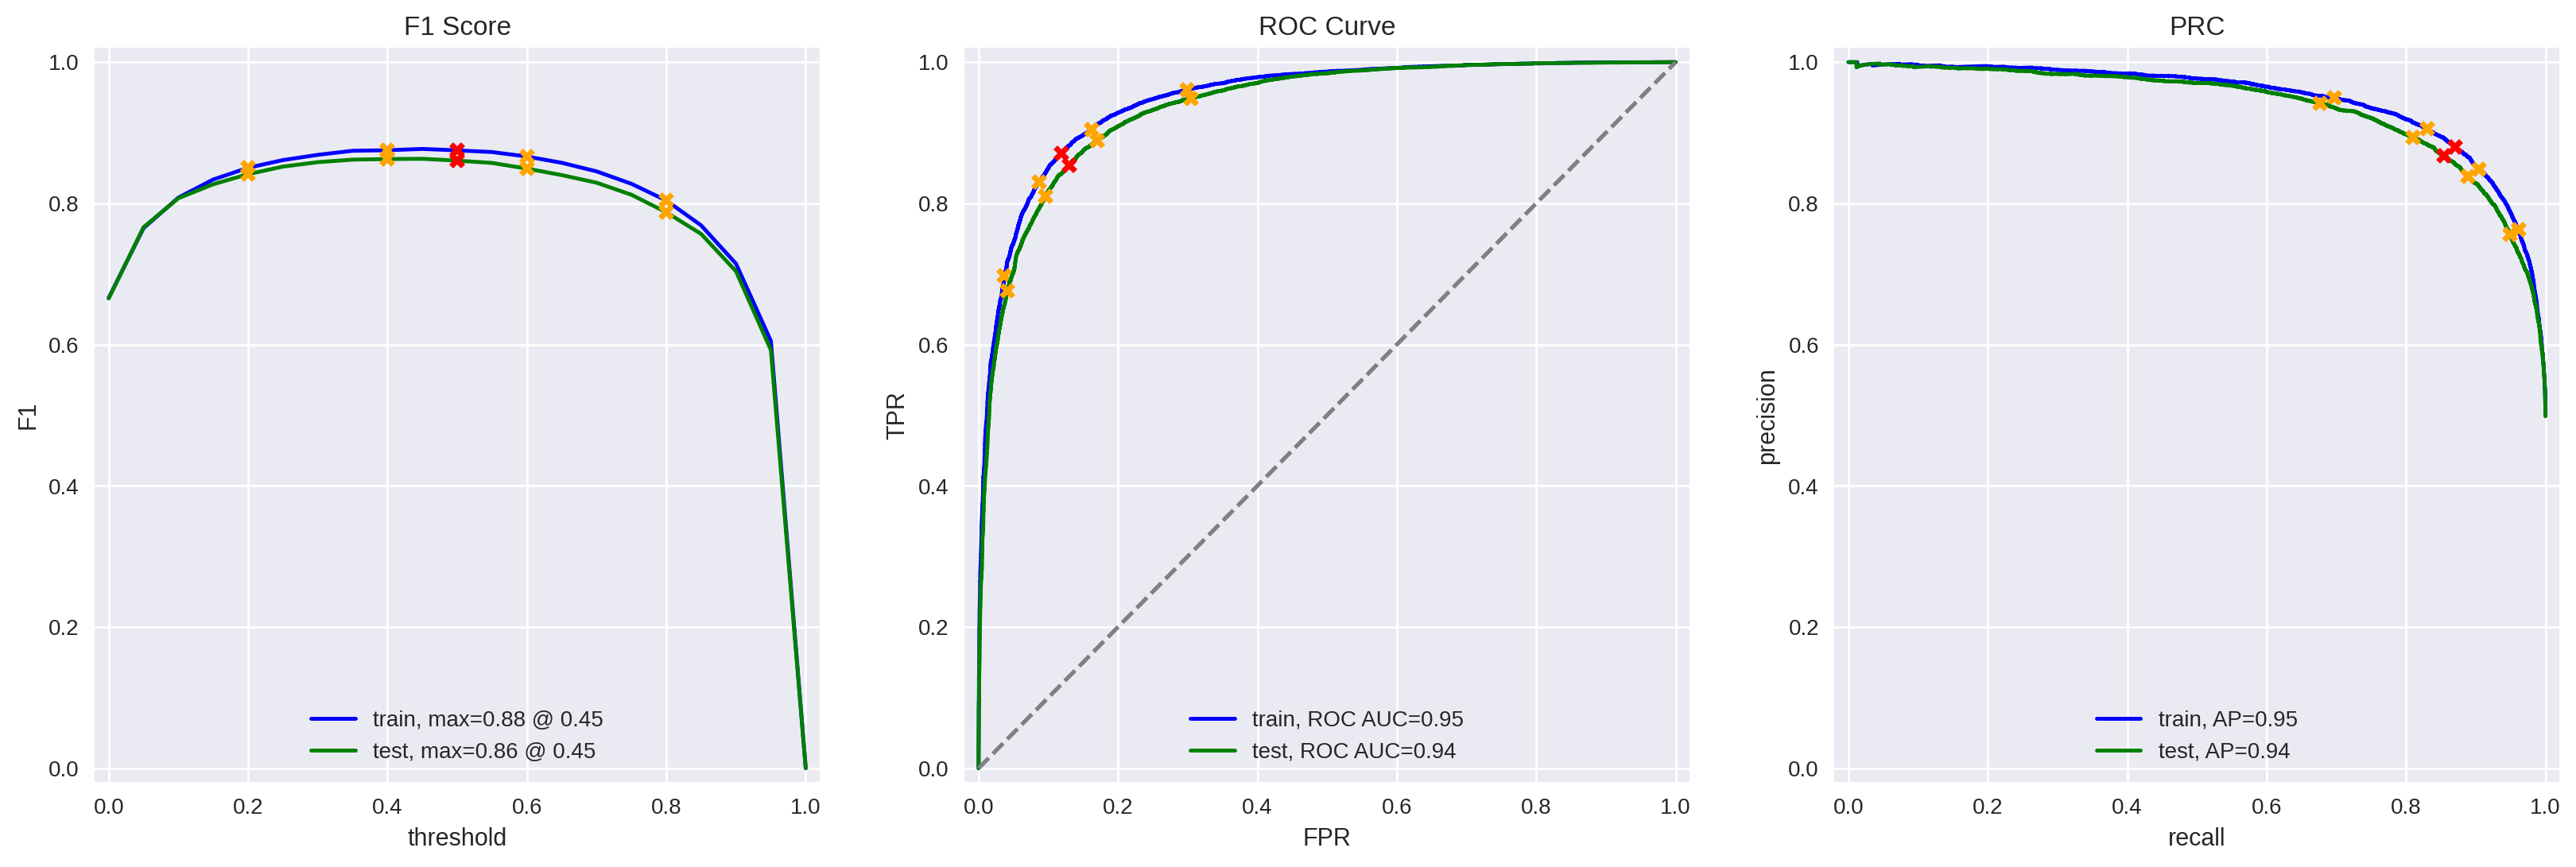

In [56]:
# perform evaluation matrix on the logistic regresson model with BERT
evaluate_model(model_6, train_features_6, train_target, test_features_6, test_target)

- BERT model with logistic regression gives results that are not too significantly different from the previous models, but this model has better performance to be free from overfitting.

## 6. Write some Reviews

In [57]:
# feel free to delete this review and try the model yourself, below is just an example 

my_reviews = pd.DataFrame([
    "Incompatible. One of the best action movies I've ever seen.",
    "I would highly recommend Don't look up, especially you like science-fiction films. You will enjoy the film so much and you don't understand how time is past.",
    'There are spectacular special effects, amazing and disturbing change of events and good acting.',    
    'I do not know about you, but to me, about 90% of the movies you can see in cinemas nowadays are dull.',
    'The scariest movie I watched in my childhood was definitely “Alien.” As I grew up, I watched it several more times, and although I still enjoyed it, it did not seem as horrifying as when I was a kid.',
    'I do not like cartoons. When I was a child, I preferred reading and drawing to watching television, cartoons included–which makes the fact that I am a movie reviewer somewhat ironic.',
    'The last time a science-fiction movie was released that did not look silly was when Christopher Nolan came out with “Interstellar.”',
    'In my opinion, Asian horror movies—Japanese, in particular—are much scarier and diverse both in terms of plot and atmosphere than American ones.'
], columns=['review'])


## 7. Check the Difference in Reviews

### 7.1. Model 1: Regular Expression

In [58]:
# model regular expressions
my_reviews['review_norm'] = my_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')

my_reviews

,review,review_norm
0,Incompatible. One of the best action movies I'...,incompatible one of the best action movies i ...
1,"I would highly recommend Don't look up, especi...",i would highly recommend don t look up especi...
2,"There are spectacular special effects, amazing...",there are spectacular special effects amazing...
3,"I do not know about you, but to me, about 90% ...",i do not know about you but to me about ...
4,The scariest movie I watched in my childhood w...,the scariest movie i watched in my childhood w...
5,"I do not like cartoons. When I was a child, I ...",i do not like cartoons when i was a child i ...
6,The last time a science-fiction movie was rele...,the last time a science fiction movie was rele...
7,"In my opinion, Asian horror movies—Japanese, i...",in my opinion asian horror movies japanese i...


### 7.2. Model 2: NLTK, TF-IDF and LR

In [59]:
# NLTK, TF-IDF dan LR 

texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.90:  incompatible  one of the best action movies i ve ever seen 
0.94:  i would highly recommend don t look up  especially you like science fiction films  you will enjoy th
0.90:  there are spectacular special effects  amazing and disturbing change of events and good acting 
0.33:  i do not know about you  but to me  about     of the movies you can see in cinemas nowadays are dull
0.95:  the scariest movie i watched in my childhood was definitely  alien   as i grew up  i watched it seve
0.67:  i do not like cartoons  when i was a child  i preferred reading and drawing to watching television  
0.45:  the last time a science fiction movie was released that did not look silly was when christopher nola
0.62:  in my opinion  asian horror movies japanese  in particular are much scarier and diverse both in term


### 7.3. Model 3: NLTK, TF-IDF and XGboost

In [60]:
# NLTK, TF-IDF dan LR 

texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.79:  incompatible  one of the best action movies i ve ever seen 
0.74:  i would highly recommend don t look up  especially you like science fiction films  you will enjoy th
0.77:  there are spectacular special effects  amazing and disturbing change of events and good acting 
0.59:  i do not know about you  but to me  about     of the movies you can see in cinemas nowadays are dull
0.79:  the scariest movie i watched in my childhood was definitely  alien   as i grew up  i watched it seve
0.61:  i do not like cartoons  when i was a child  i preferred reading and drawing to watching television  
0.59:  the last time a science fiction movie was released that did not look silly was when christopher nola
0.53:  in my opinion  asian horror movies japanese  in particular are much scarier and diverse both in term


### 7.4 Model 4: spaCy, TF-IDF and LR

In [61]:
# spaCy, TF-IDF dan LR

texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_4(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.83:  incompatible  one of the best action movies i ve ever seen 
0.97:  i would highly recommend don t look up  especially you like science fiction films  you will enjoy th
0.91:  there are spectacular special effects  amazing and disturbing change of events and good acting 
0.42:  i do not know about you  but to me  about     of the movies you can see in cinemas nowadays are dull
0.95:  the scariest movie i watched in my childhood was definitely  alien   as i grew up  i watched it seve
0.51:  i do not like cartoons  when i was a child  i preferred reading and drawing to watching television  
0.30:  the last time a science fiction movie was released that did not look silly was when christopher nola
0.73:  in my opinion  asian horror movies japanese  in particular are much scarier and diverse both in term


### 7.5. Model 5: spaCy, TF-IDF dan LGBMClassifier

In [62]:
# spaCy, TF-IDF dan LGBMClassifier

texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_4
my_reviews_pred_prob = model_5.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_4(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.90:  incompatible  one of the best action movies i ve ever seen 
0.94:  i would highly recommend don t look up  especially you like science fiction films  you will enjoy th
0.90:  there are spectacular special effects  amazing and disturbing change of events and good acting 
0.41:  i do not know about you  but to me  about     of the movies you can see in cinemas nowadays are dull
0.91:  the scariest movie i watched in my childhood was definitely  alien   as i grew up  i watched it seve
0.53:  i do not like cartoons  when i was a child  i preferred reading and drawing to watching television  
0.40:  the last time a science fiction movie was released that did not look silly was when christopher nola
0.76:  in my opinion  asian horror movies japanese  in particular are much scarier and diverse both in term


### 7.6. Model 6: BERT and LR

In [63]:
# BERT model

texts = my_reviews['review_norm']

my_reviews_features_6 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_6.predict_proba(my_reviews_features_6)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.98:  incompatible  one of the best action movies i ve ever seen 
0.68:  i would highly recommend don t look up  especially you like science fiction films  you will enjoy th
0.38:  there are spectacular special effects  amazing and disturbing change of events and good acting 
0.40:  i do not know about you  but to me  about     of the movies you can see in cinemas nowadays are dull
0.79:  the scariest movie i watched in my childhood was definitely  alien   as i grew up  i watched it seve
0.96:  i do not like cartoons  when i was a child  i preferred reading and drawing to watching television  
0.62:  the last time a science fiction movie was released that did not look silly was when christopher nola
0.78:  in my opinion  asian horror movies japanese  in particular are much scarier and diverse both in term


Maybe some of us think that small differences like spaces, punctuation are not a big deal. But for machines these differences can produce evaluation results with significant differences.

## Conclusions

**1. Data Preparing**
- We start with data totaling 47331 rows and 17 columns.
- The train set and test set have a 50:50 ratio.

**2. EDA**
- We know that every year the number of movies reviewed increases. It can happen because the number of members is getting bigger, and people find it difficult to access previous movies, especially if they still need to be in digital form.
- The number of positive and negative reviews also has a 50:50 ratio.

**3. Model**
- The **logistic regression** model with NLTK, TF-IDF produces a much better F1 value than the dummy classifier model and passes the threshold value.
- Although the F1 score results of NLTK, TF-IDF with XGBoost are not better than the vectorization results with Logistic Regression, this model is less prone to overfitting.
- The **logistic regression** model with Spacy, TF-IDF produces F1 values that are almost the same as NLTK, TF-IDF but with slightly better results.
- **The LGBM model with Spacy, TF-IDF** produces F1 values that are not better than the **logistic regression** model with Spacy, TF-IDF.
- **BERT** model with **logistic regression** gives results that are not too significantly different from the previous models, but this model has better performance to be free from overfitting.

**Main Conclusion**
- The BERT model does produce the best performance and is free from overfitting, but it does take a very long time to transform. We can consider this model if our main goal is to get the best F1 results.
- But if our main focus is on the transformation time, we should use NLTK, TF-IDF and XGBoost, which have similar results to the BERT model.
